# Solution to Exercise 2

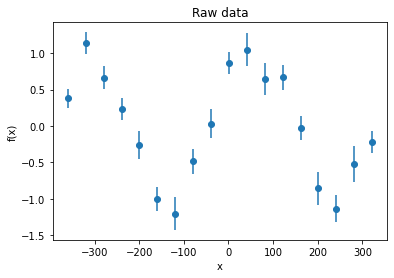

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 18
    # variables        = 2
    chi-square         = 20.9731858
    reduced chi-square = 1.31082411
    Akaike info crit   = 6.75171398
    Bayesian info crit = 8.53245750
[[Variables]]
    frequency:  0.97869072 +/- 0.01698279 (1.74%) (init = 1)
    phase:      0.62066226 +/- 0.06485177 (10.45%) (init = 0)


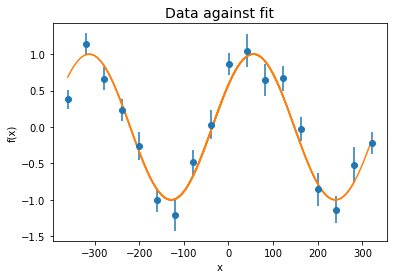

In [3]:
# -*- coding: utf-8 -*-
"""
Use LMFIT package performing a minimised chi-squared fit to find the
frequency and phase of a sine curve.

This is the solution to exercise 2.

Tangdi Luan 07/NOV/2023

"""
import numpy as np
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, fit_report


params = Parameters()
params.add("frequency", value = 1.)
params.add("phase", value = 0.)


def sin_function(angle,frequency, phase):
    """
    computes sin(frequency * angle + phase) for angle in degrees and phase in radians.
    
    frequency (float)
    angle (float)
    phase(float)
    """
    rad_angle = np.deg2rad(angle)
    return np.sin(frequency*rad_angle + phase)


def get_residual(params, x_values, function_data, uncertainties):
    a_coefficient = params["frequency"].value
    b_coefficient = params["phase"].value
    prediction = sin_function(x_values, a_coefficient, b_coefficient)
    return (function_data - prediction)/uncertainties


if __name__=="__main__":
    # Get data ----------------------------------------------------------------------------------------------------------
    filename = 'sin_data.txt'
    DATA = np.loadtxt(filename, delimiter='\t', skiprows=1)
    DATA = np.transpose(DATA)
        
    # Plot raw data -----------------------------------------------------------------------------------------------------
    RAW_DATA_FIGURE = plt.figure()
    RAW_DATA_PLOT = RAW_DATA_FIGURE.add_subplot(111)

    RAW_DATA_PLOT.set_title('Raw data')
    RAW_DATA_PLOT.set_xlabel('x')
    RAW_DATA_PLOT.set_ylabel('f(x)')


    RAW_DATA_PLOT.errorbar(DATA[0], DATA[1], yerr=DATA[2], fmt='o', color='C0')
    plt.show()


    # Using LMFIT package to find best value for coefficient by trying everything ---------------------------------------
    out = minimize(get_residual, params, args=(DATA[0], DATA[1], DATA[2]))
    print(fit_report(out))
    FITTED_PARAMETERS = [out.params["frequency"].value, out.params["phase"].value]


    # Visually compare result with data ---------------------------------------------------------------------------------

    FITTED_DATA_FIGURE = plt.figure()
    FITTED_DATA_PLOT = FITTED_DATA_FIGURE.add_subplot(111)

    FITTED_DATA_PLOT.set_title('Data against fit', fontsize=14)
    FITTED_DATA_PLOT.set_xlabel('x')
    FITTED_DATA_PLOT.set_ylabel('f(x)')

    X_VALUES = np.linspace(DATA[0],DATA[-1],50)
    FITTED_DATA_PLOT.plot(X_VALUES, sin_function(X_VALUES, FITTED_PARAMETERS[0], FITTED_PARAMETERS[1]), color='C1')
    FITTED_DATA_PLOT.errorbar(DATA[0], DATA[1], yerr=DATA[2], fmt='o', color='C0')
    plt.show()